<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/Build_an_EASY_Multiclass_Classification_Model_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X=iris.data
y=iris.target

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X.shape,y.shape

((150, 4), (150,))

In [ ]:
iris_df=pd.DataFrame({'X1':X[:,0],
                      'X2':X[:,1],
                      'X3':X[:,2],
                      'X4':X[:,3],
                      'y':y})


In [ ]:
iris_df

,X1,X2,X3,X4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris_df.y.value_counts()

,count
y,
0,50
1,50
2,50


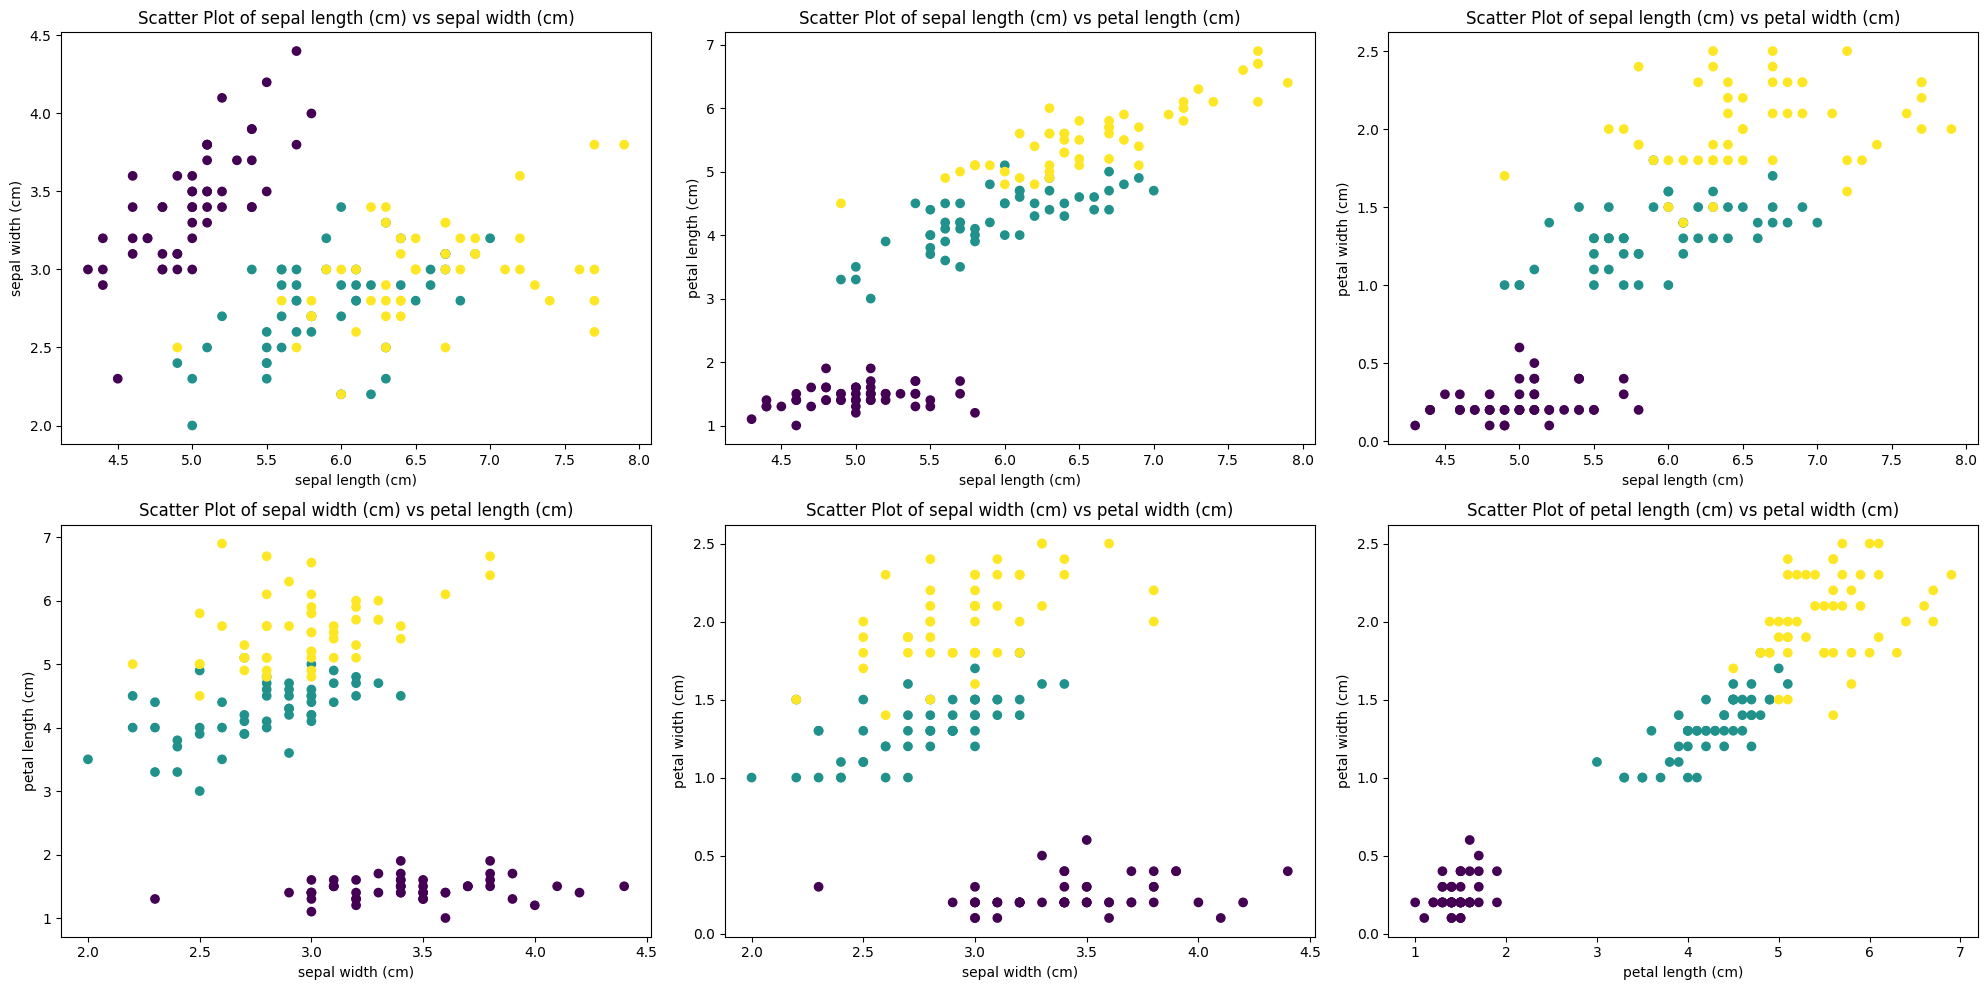

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,10))


feature_combinations=[(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)]

for ax,features in zip(axes.flatten(),feature_combinations):
  feature1,feature2=features
  ax.scatter(iris_df.iloc[:,feature1],iris_df.iloc[:,feature2],c=iris_df.y,cmap='viridis')
  ax.set_title(f'Scatter Plot of {iris.feature_names[feature1]} vs {iris.feature_names[feature2]}')
  ax.set_xlabel(iris.feature_names[feature1])
  ax.set_ylabel(iris.feature_names[feature2])

plt.tight_layout()
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
X_train_tensor=torch.tensor(X_train,dtype=torch.float32).to(device)
y_train_tensor=torch.tensor(y_train,dtype=torch.int64).to(device)
X_test_tensor=torch.tensor(X_test,dtype=torch.float32).to(device)
y_test_tensor=torch.tensor(y_test,dtype=torch.int64).to(device)

In [ ]:
class SimpleClassifier(nn.Module):
  def __init__(self,input_features,output_features):
    super().__init__()
    self.layer_1=nn.Linear(input_features,120)
    self.layer_2=nn.Linear(120,10)
    self.layer_3=nn.Linear(10,output_features)

  def forward(self,x):
    x=self.layer_3(self.layer_2(self.layer_1(x)))
    return x

In [ ]:
input_features=X_train.shape[1]
output_features=len(set(y))

model=SimpleClassifier(input_features,output_features).to(device)

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [ ]:
from re import A
num_epochs=1000

for epoch in range(num_epochs):
  model.train()

  # forward pass
  outputs=model(X_train_tensor)
  loss=criterion(outputs,y_train_tensor)

  _,predicted_label=torch.max(outputs,1)
  correct_predictions=(predicted_label==y_train_tensor).sum().item()

  tatal_samples=len(y_train_tensor)
  acc=correct_predictions/tatal_samples

  # backward pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1)%10==0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc:.4f}')

Epoch [10/1000], Loss: 0.9333, Accuracy: 0.6583
Epoch [20/1000], Loss: 0.7531, Accuracy: 0.6750
Epoch [30/1000], Loss: 0.6341, Accuracy: 0.6750
Epoch [40/1000], Loss: 0.5539, Accuracy: 0.9250
Epoch [50/1000], Loss: 0.4999, Accuracy: 0.9250
Epoch [60/1000], Loss: 0.4625, Accuracy: 0.8750
Epoch [70/1000], Loss: 0.4351, Accuracy: 0.8667
Epoch [80/1000], Loss: 0.4137, Accuracy: 0.8667
Epoch [90/1000], Loss: 0.3961, Accuracy: 0.8667
Epoch [100/1000], Loss: 0.3810, Accuracy: 0.8667
Epoch [110/1000], Loss: 0.3677, Accuracy: 0.8667
Epoch [120/1000], Loss: 0.3558, Accuracy: 0.8667
Epoch [130/1000], Loss: 0.3449, Accuracy: 0.8750
Epoch [140/1000], Loss: 0.3349, Accuracy: 0.8750
Epoch [150/1000], Loss: 0.3257, Accuracy: 0.8750
Epoch [160/1000], Loss: 0.3171, Accuracy: 0.8833
Epoch [170/1000], Loss: 0.3090, Accuracy: 0.8917
Epoch [180/1000], Loss: 0.3013, Accuracy: 0.8917
Epoch [190/1000], Loss: 0.2940, Accuracy: 0.8917
Epoch [200/1000], Loss: 0.2871, Accuracy: 0.9083
Epoch [210/1000], Loss: 0.280

In [ ]:
model.eval()
with torch.inference_mode():
  outputs=model(X_test_tensor)

  _,predicted=torch.max(outputs,1)

  accuracy=accuracy_score(y_test,predicted.numpy())

  predicted_tensor=predicted.clone().detach()
  loss=criterion(outputs,predicted_tensor)

  print(f'Test Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}')

Test Loss: 0.0650, Accuracy: 1.0000
